> **Tip**: Welcome to the Investigate a Dataset project! You will find tips in quoted sections like this to help organize your approach to your investigation. Once you complete this project, remove these **Tip** sections from your report before submission. First things first, you might want to double-click this Markdown cell and change the title so that it reflects your dataset and investigation.

# Project: No show Apointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.

‘ScheduledDay’ tells us on what day the patient set up their appointment.
‘Neighborhood’ indicates the location of the hospital.
‘Scholarship’ indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.



### Question(s) for Analysis
What factors are important for us to know in order to predict if a patient will show up for their scheduled appointment? 

In [3]:
# setting up import statements for all of the packages that I need

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline



In [67]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0


  Using cached https://files.pythonhosted.org/packages/1d/9a/7eb9952f4b4d73fbd75ad1d5d6112f407e695957444cb695cbb3cdab918a/pandas-0.25.0-cp36-cp36m-manylinux1_x86_64.whl
visions 0.7.4 has requirement pandas>=0.25.3, but you'll have pandas 0.25.0 which is incompatible.
  Found existing installation: pandas 1.1.5
    Uninstalling pandas-1.1.5:
      Successfully uninstalled pandas-1.1.5


<a id='wrangling'></a>
## Data Wrangling


Check for information , datatypes , cleanliness , and important data




In [4]:
# Load your data and print out a few lines. Perform operations to inspect data

df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


there is no missing data

In [6]:
#showing number of patients visits
df.shape

(110527, 14)

There are 110527 visits

In [7]:
#Showing Age charactristics of the patients
df['Age'].describe()

count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

The mean Age is 37 and there is a fault in the min Age which is -1 

In [8]:
#Showing sum of duplicants
df.duplicated().sum()

0

There is no duplicated rows


### Data Cleaning
Cleaning and preparing data for analysis

In [9]:
# Investgate how many patient has the -1 fault in his/her age
redundant = df.query('Age == "-1"')
redundant


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


only one patient has the -1 fault in his Age 

In [10]:
#removing the -1 fault in the row number 99832
df.drop(index=99832,inplace=True )
df['Age'].describe()

count    110526.000000
mean         37.089219
std          23.110026
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64

-1 fault removed using patient row number

In [11]:
#Correction of spelling and Format
df.rename(columns={'Hipertension':'Hypertension'},inplace =True)
df.rename(columns={'No-show':'Noshow'},inplace =True)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [12]:
#Removing unnecessary data
df.drop(['PatientId','AppointmentID','ScheduledDay','AppointmentDay'],axis = 1, inplace = True)
df.head()


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
df.tail()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handcap,SMS_received,Noshow
110522,F,56,MARIA ORTIZ,0,0,0,0,0,1,No
110523,F,51,MARIA ORTIZ,0,0,0,0,0,1,No
110524,F,21,MARIA ORTIZ,0,0,0,0,0,1,No
110525,F,38,MARIA ORTIZ,0,0,0,0,0,1,No
110526,F,54,MARIA ORTIZ,0,0,0,0,0,1,No


<a id='eda'></a>
## Exploratory Data Analysis

Creating statistics computations and visualzations




### Statistics of the attendance of patients

In [14]:
#showing the total number of show and no show 

show= df.Noshow== 'No'
noshow= df.Noshow == 'Yes'
df[show].count()




Gender           88207
Age              88207
Neighbourhood    88207
Scholarship      88207
Hypertension     88207
Diabetes         88207
Alcoholism       88207
Handcap          88207
SMS_received     88207
Noshow           88207
dtype: int64

In [15]:
df[noshow].count()

Gender           22319
Age              22319
Neighbourhood    22319
Scholarship      22319
Hypertension     22319
Diabetes         22319
Alcoholism       22319
Handcap          22319
SMS_received     22319
Noshow           22319
dtype: int64

In [16]:
df[show].mean()

Age             37.790504
Scholarship      0.093904
Hypertension     0.204394
Diabetes         0.073838
Alcoholism       0.030417
Handcap          0.022742
SMS_received     0.291337
dtype: float64

In [17]:
df[noshow].mean()

Age             34.317667
Scholarship      0.115507
Hypertension     0.169004
Diabetes         0.064071
Alcoholism       0.030333
Handcap          0.020297
SMS_received     0.438371
dtype: float64

### Visualtizations Analysis

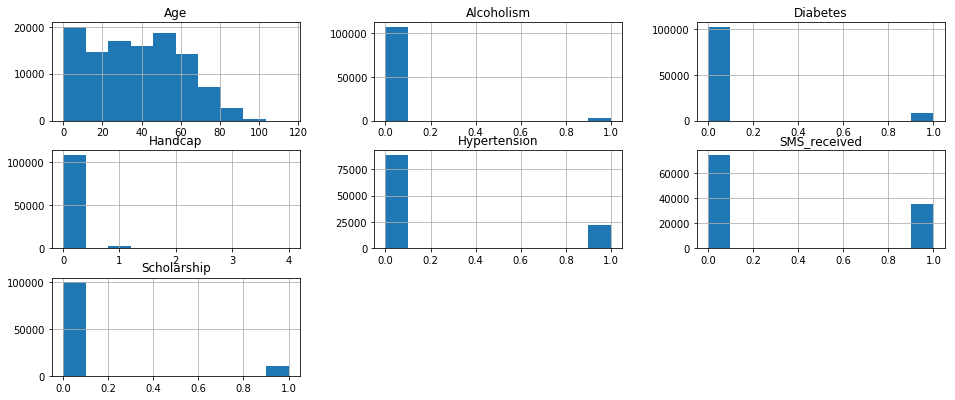

In [23]:
df.hist(figsize=(16,6.5));


most of patients doesn't suffer Hypertension, Diabetes, Alcoholism, or Handcap
most of patients neither have scholarships nor received SMS

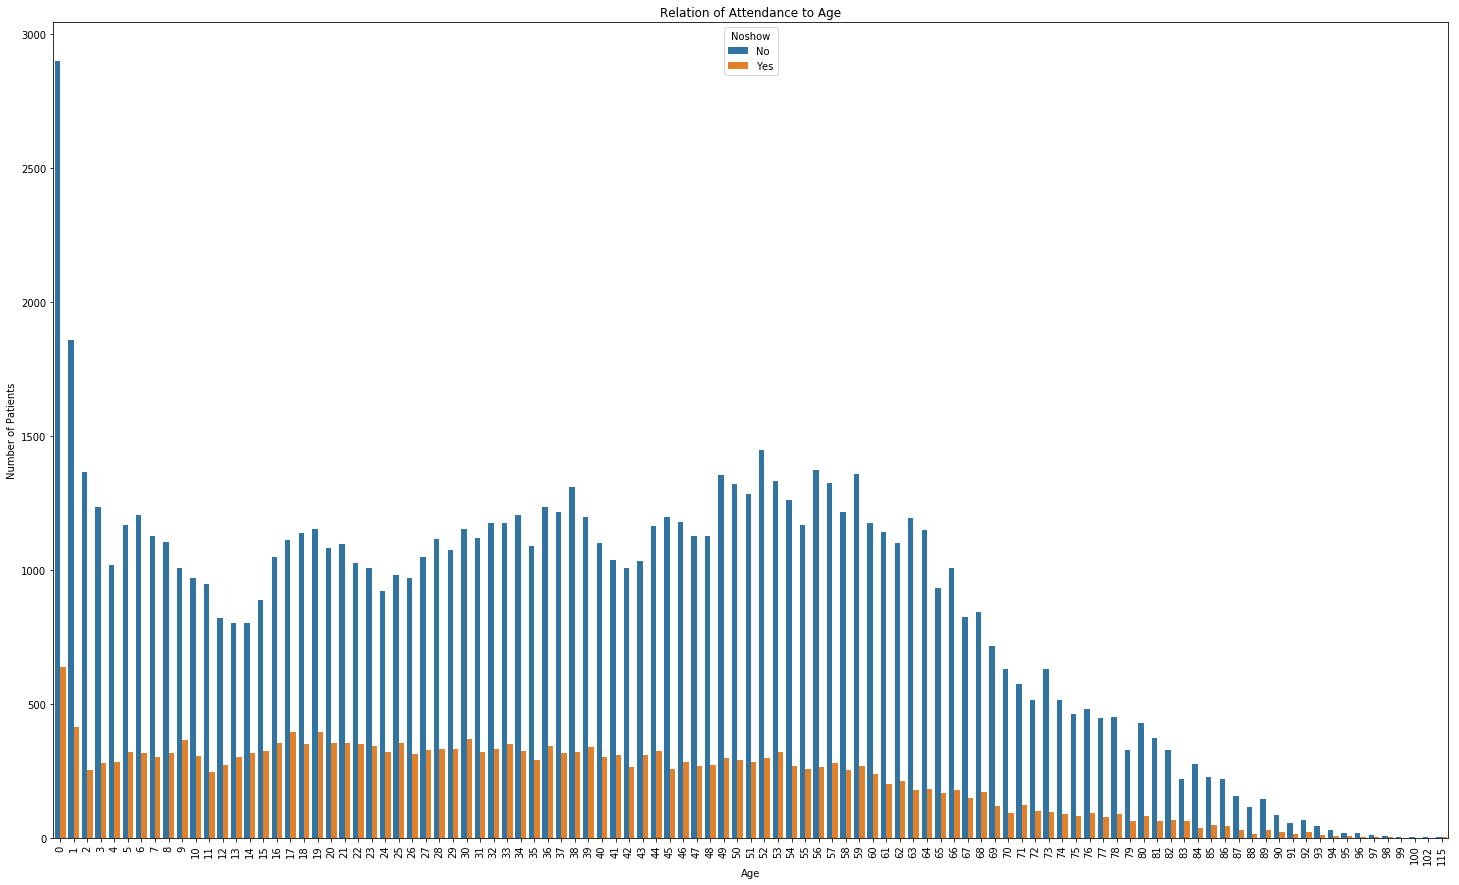

In [18]:
#showing the relation of attendance to Age
import seaborn as sns
plt.figure(figsize=[25,15])
plt.xticks(rotation = 90)
y = sns.countplot(x=df.Age, hue=df.Noshow)
plt.title('Relation of Attendance to Age')
plt.xlabel('Age')
plt.ylabel('Number of Patients');
#df.Age[noshow].hist(alpha=1,bins=10,color='red',label= 'noshow')
#df.Age[show].hist(alpha=0.5,bins=10,color='green',label= 'show')
#plt.title('Relation of Attendance to Age')
#plt.xlabel('Age')
#plt.ylabel('Number of Patients');

Age from 0 to 10 is the most attendant followed by Age from 50 to 60

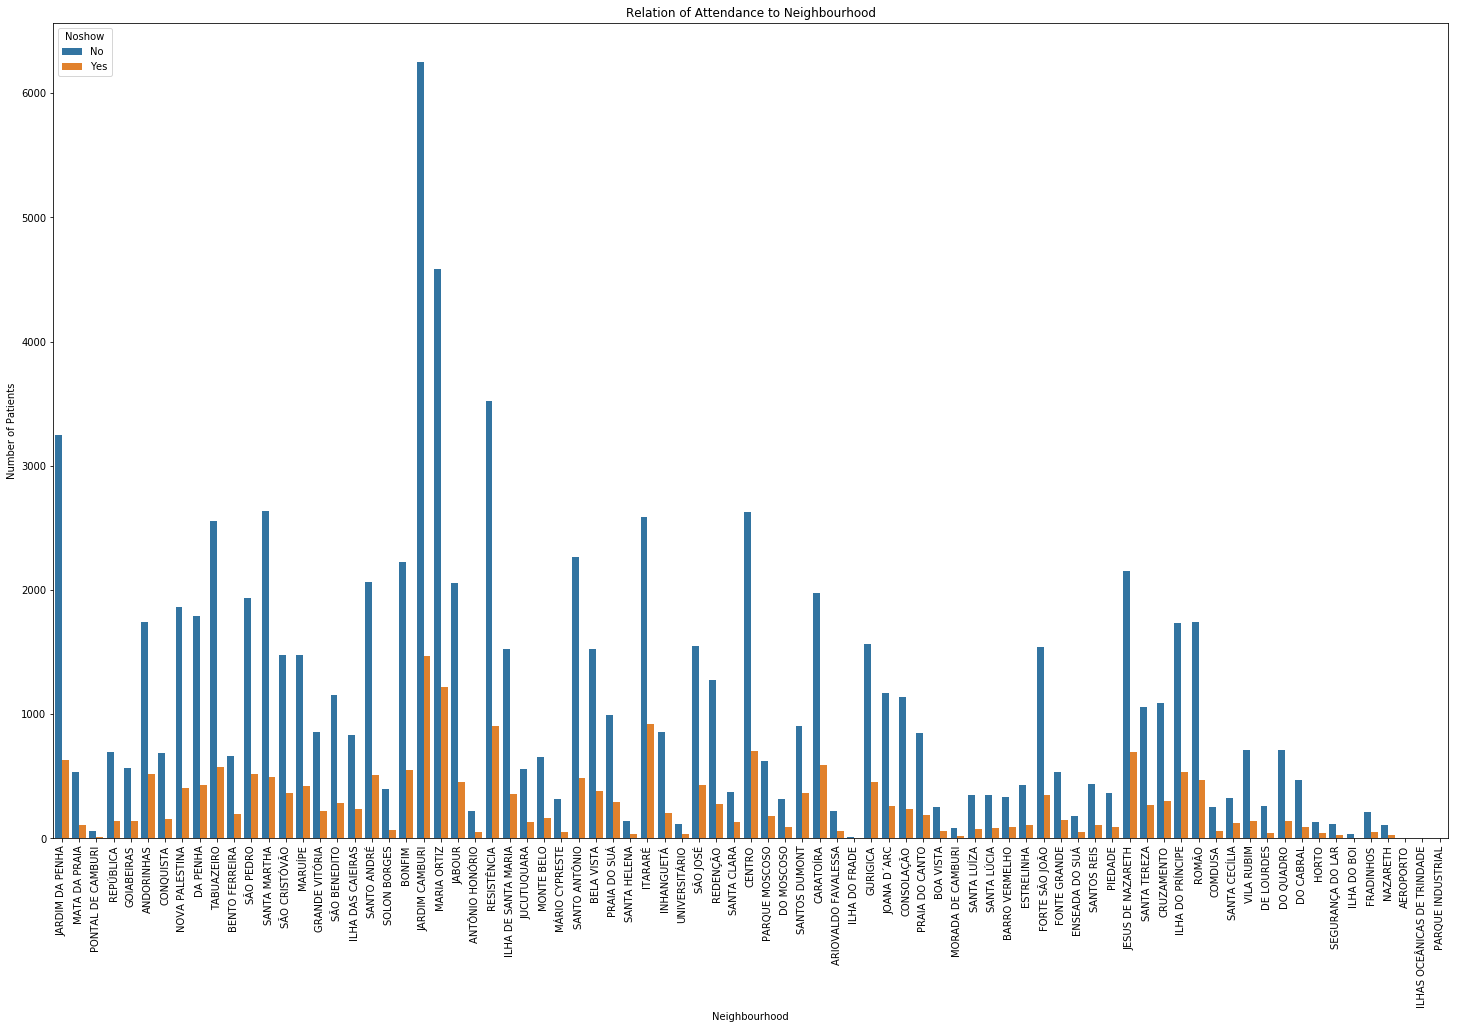

In [19]:
#showing the relation of the attendance to Neighbourhood
plt.figure(figsize=[25,15])
plt.xticks(rotation = 90)
y = sns.countplot(x=df.Neighbourhood, hue=df.Noshow)
plt.title('Relation of Attendance to Neighbourhood')
plt.xlabel('Neighbourhood')
plt.ylabel('Number of Patients');

Neighbourhood differs significantly between "Jardim Camburi" and the rest of areas

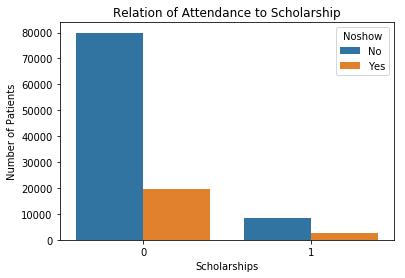

In [20]:
#showing the relation of the attendance to Scholarship
x= sns.countplot(x=df.Scholarship, hue=df.Noshow, data=df)
plt.title('Relation of Attendance to Scholarship')
plt.xlabel('Scholarships')
plt.ylabel('Number of Patients');
plt.show()





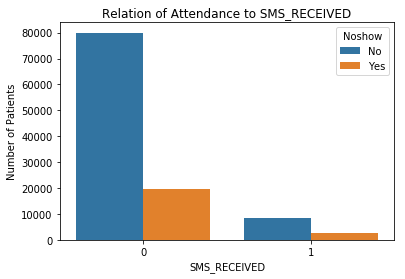

In [21]:
#showing the relation of the attendance to SMS_received
x= sns.countplot(x=df.Scholarship, hue=df.Noshow, data=df)
plt.title('Relation of Attendance to SMS_RECEIVED')
plt.xlabel('SMS_RECEIVED')
plt.ylabel('Number of Patients');
plt.show()

patients who don't receive SMS tend to have appointments more than those who receive SMS

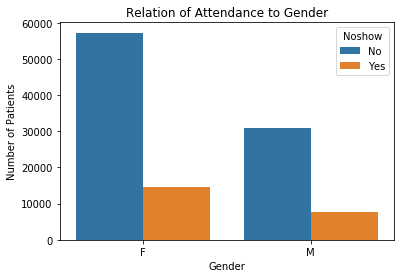

In [24]:
#showing the relation of the attendance to Gender

x= sns.countplot(x=df.Gender, hue=df.Noshow, data=df)
plt.title('Relation of Attendance to Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Patients');
plt.show()

there is no a big difference between the attendance relation of both genders but most of the patients are females

<a id='conclusions'></a>
## Conclusions

Ages from 0 to 10 and from 50 to 60 are the more showing than other ranges
The biggest impact of attendance comes from neighbourhood 
Receiving SMS affects showing of patients negatively as most of showed persons didn't receive SMSs


### Limitations
No Limitations detected only the impact comes from the concluded points

## Submitting your Project 

> **Tip**: Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> **Tip**: Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> **Tip**: Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [ ]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])